# PROBLEM STATEMENT 

- Dataset includes house sale prices for King County in USA. 
- Homes that are sold in the time period: May, 2014 and May, 2015.
- Data Source: https://www.kaggle.com/harlfoxem/housesalesprediction

- Columns:
    - ida: notation for a house
    - date: Date house was sold
    - price: Price is prediction target
    - bedrooms: Number of Bedrooms/House
    - bathrooms: Number of bathrooms/House
    - sqft_living: square footage of the home
    - sqft_lot: square footage of the lot
    - floors: Total floors (levels) in house
    - waterfront: House which has a view to a waterfront
    - view: Has been viewed
    - condition: How good the condition is ( Overall )
    - grade: overall grade given to the housing unit, based on King County grading system
    - sqft_abovesquare: footage of house apart from basement
    - sqft_basement: square footage of the basement
    - yr_built: Built Year
    - yr_renovated: Year when house was renovated
    - zipcode: zip
    - lat: Latitude coordinate
    - long: Longitude coordinate
    - sqft_living15: Living room area in 2015(implies-- some renovations) 
    - sqft_lot15: lotSize area in 2015(implies-- some renovations)

# LIBRARIES IMPORT 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# IMPORT DATASET

In [2]:
dataset = pd.read_csv('dataset/kc_house_data.csv')

In [3]:
dataset.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
dataset.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [6]:
dataset.tail(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21603,7852140040,20140825T000000,507250.0,3,2.50,2270,5536,2.0,0,0,...,8,2270,0,2003,0,98065,47.5389,-121.881,2270,5731
21604,9834201367,20150126T000000,429000.0,3,2.00,1490,1126,3.0,0,0,...,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
21605,3448900210,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


# VISUALIZE DATASET 

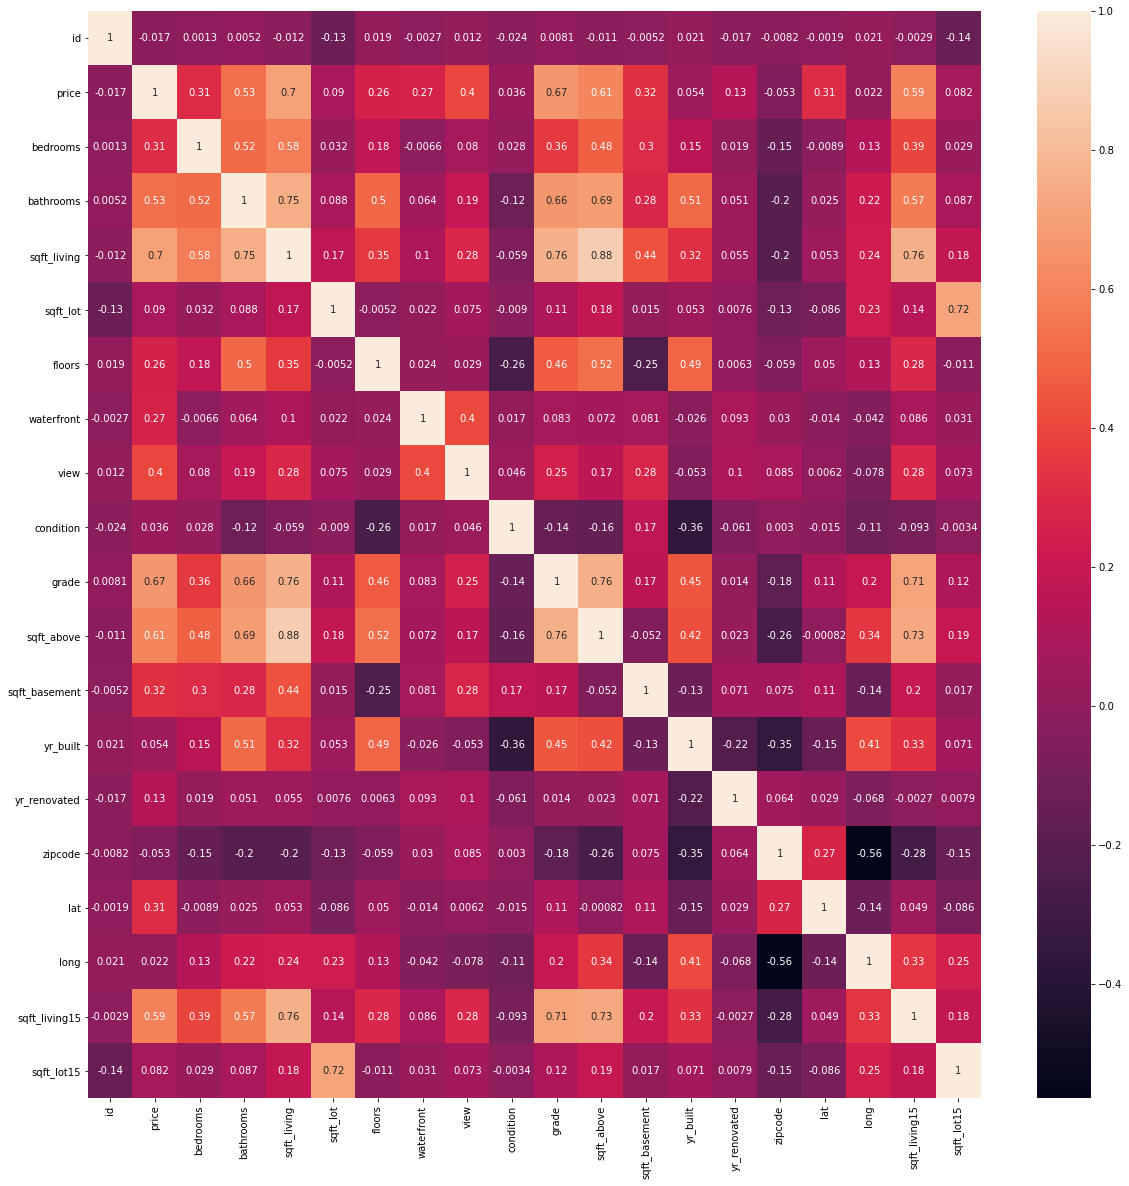

In [7]:
plt.figure(figsize = (20, 20))
sns.heatmap(dataset.corr(), annot = True)

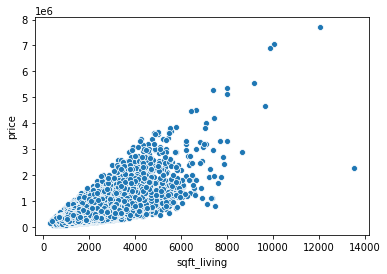

In [8]:
sns.scatterplot(x = 'sqft_living', y = 'price', data = dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa23c24eed0>,
      dtype=object)

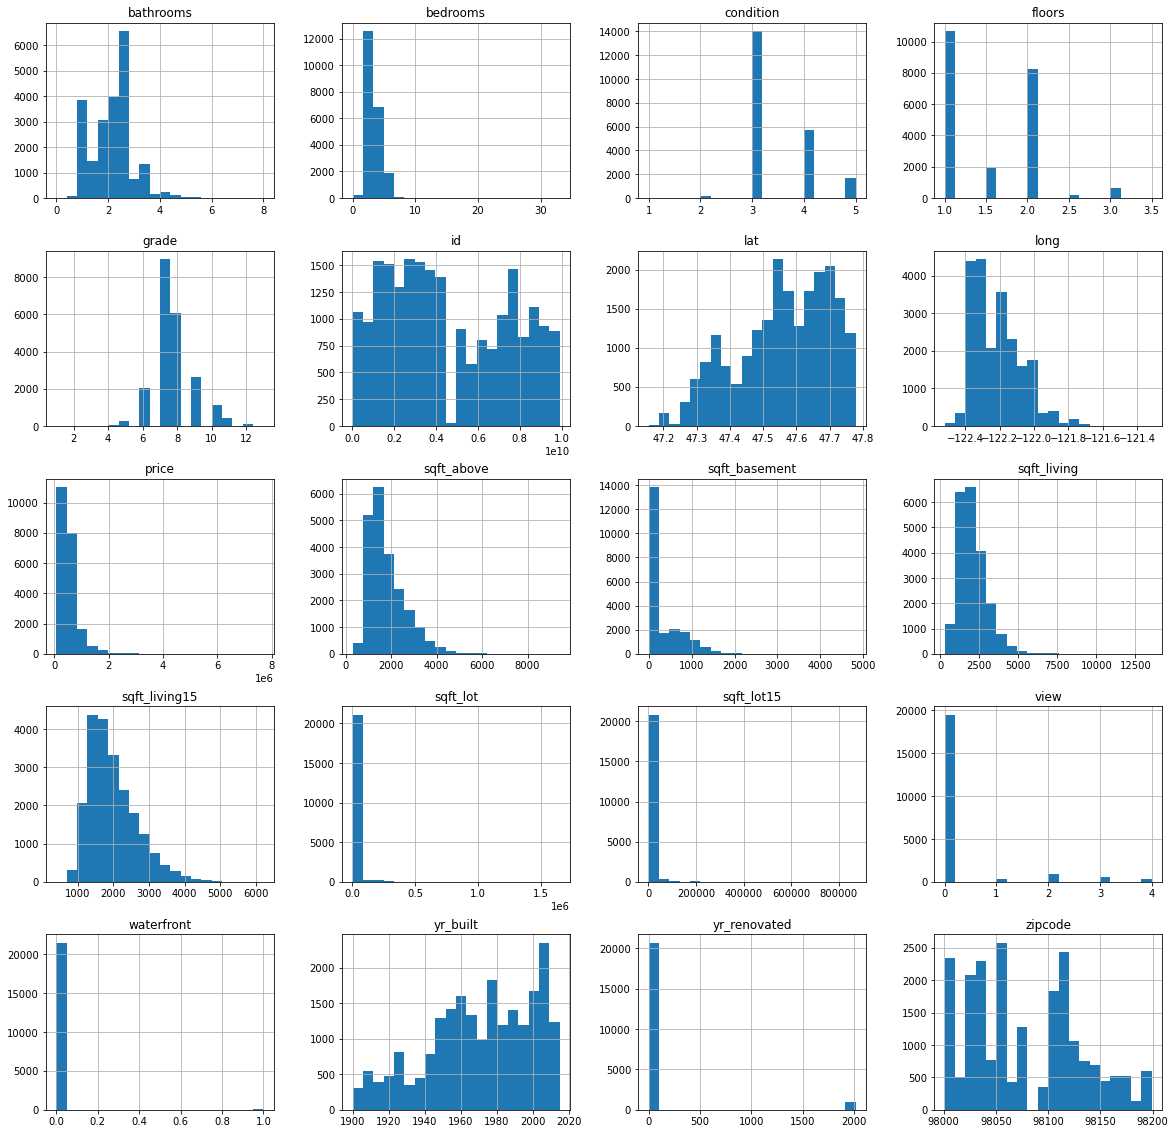

In [9]:
dataset.hist(bins = 20, figsize = (20, 20))

In [10]:
dataset_sample = dataset[
    ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']
]

print(dataset_sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   sqft_above     21613 non-null  int64  
 6   sqft_basement  21613 non-null  int64  
 7   yr_built       21613 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 1.3 MB
None


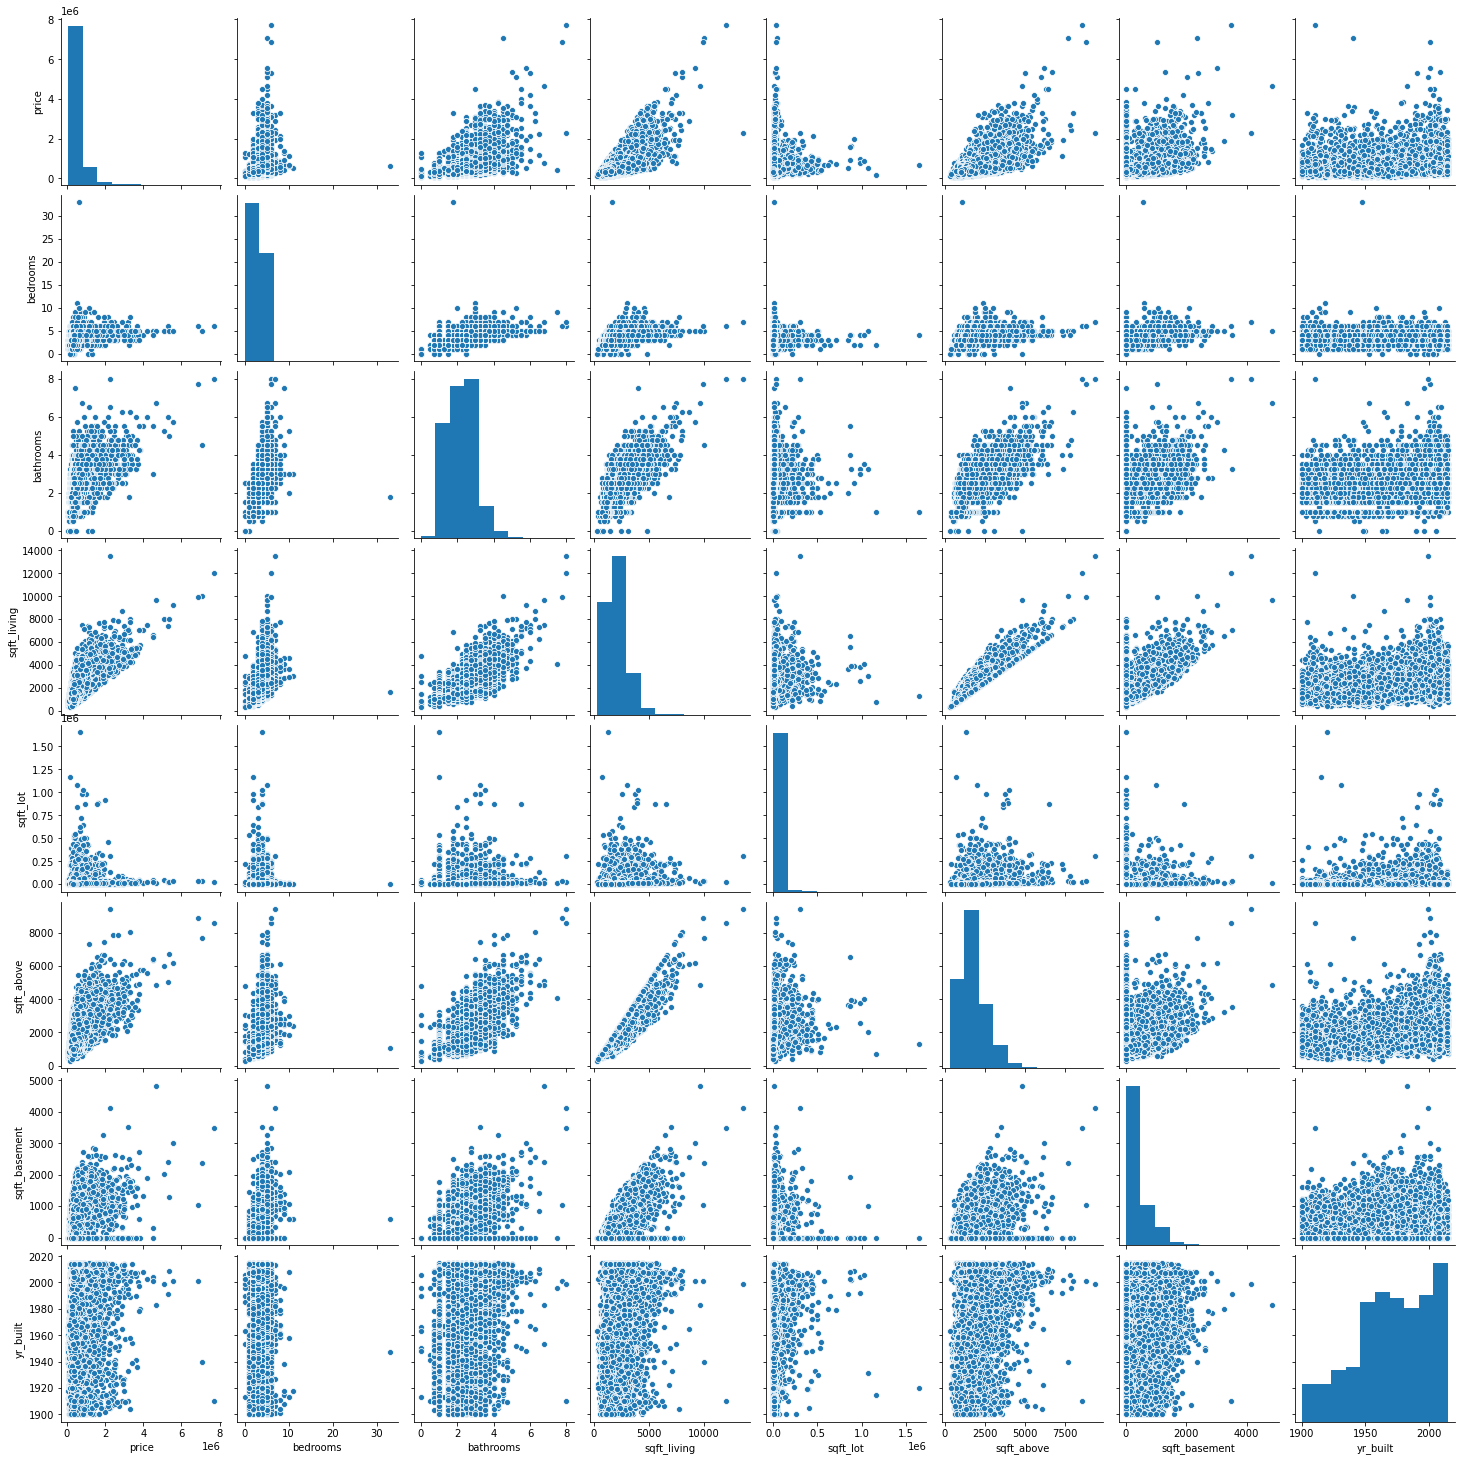

In [11]:
sns.pairplot(dataset_sample)

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING 

In [12]:
X = dataset_sample.drop(['price'], axis = 1)
y = dataset_sample['price']

print(X.info())
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       21613 non-null  int64  
 1   bathrooms      21613 non-null  float64
 2   sqft_living    21613 non-null  int64  
 3   sqft_lot       21613 non-null  int64  
 4   sqft_above     21613 non-null  int64  
 5   sqft_basement  21613 non-null  int64  
 6   yr_built       21613 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 1.2 MB
None
(21613,)


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_scaled = scaler.fit_transform(X)

print(X_scaled)
print(X_scaled.shape)

[[0.09090909 0.125      0.06716981 ... 0.09758772 0.         0.47826087]
 [0.09090909 0.28125    0.17207547 ... 0.20614035 0.08298755 0.44347826]
 [0.06060606 0.125      0.03622642 ... 0.05263158 0.         0.28695652]
 ...
 [0.06060606 0.09375    0.05509434 ... 0.08004386 0.         0.94782609]
 [0.09090909 0.3125     0.09886792 ... 0.14364035 0.         0.90434783]
 [0.06060606 0.09375    0.05509434 ... 0.08004386 0.         0.93913043]]
(21613, 7)


In [16]:
y = y.values.reshape(-1, 1)

print(y)

[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]


In [17]:
y_scaled = scaler.fit_transform(y)

print(y_scaled)

[[0.01926557]
 [0.06072131]
 [0.01377049]
 ...
 [0.04289849]
 [0.04262295]
 [0.03278689]]


# TRAINING THE MODEL

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16209, 7) (16209, 1)
(5404, 7) (5404, 1)


In [19]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 9.2465e-04 - val_loss: 9.7519e-04
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 9.0750e-04 - val_loss: 9.5534e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 8.8637e-04 - val_loss: 9.5839e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 8.9075e-04 - val_loss: 9.5704e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 8.7278e-04 - val_loss: 9.6779e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 8.9136e-04 - val_loss: 9.4249e-04
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 8.8031e-04 - val_loss: 9.3937e-04
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 8.6028e-04 - val_loss: 9.3575e-04
Epoch 10/100
260/260 [=====

Epoch 76/100
260/260 [==============================] - 0s 2ms/step - loss: 7.8204e-04 - val_loss: 9.3865e-04
Epoch 77/100
260/260 [==============================] - 0s 2ms/step - loss: 7.7995e-04 - val_loss: 9.4355e-04
Epoch 78/100
260/260 [==============================] - 0s 2ms/step - loss: 7.8549e-04 - val_loss: 9.6961e-04
Epoch 79/100
260/260 [==============================] - 0s 2ms/step - loss: 7.7459e-04 - val_loss: 0.0010
Epoch 80/100
260/260 [==============================] - 0s 2ms/step - loss: 7.7978e-04 - val_loss: 9.8781e-04
Epoch 81/100
260/260 [==============================] - 0s 2ms/step - loss: 7.9517e-04 - val_loss: 9.7291e-04
Epoch 82/100
260/260 [==============================] - 0s 2ms/step - loss: 7.7679e-04 - val_loss: 9.6568e-04
Epoch 83/100
260/260 [==============================] - 0s 2ms/step - loss: 7.8296e-04 - val_loss: 9.6320e-04
Epoch 84/100
260/260 [==============================] - 0s 2ms/step - loss: 7.6940e-04 - val_loss: 0.0010
Epoch 85/100
260/2

# EVALUATING THE MODEL 

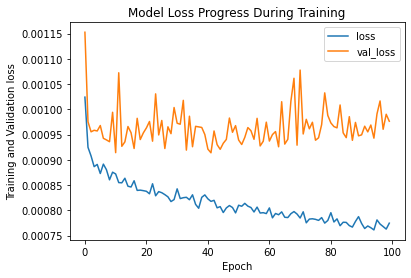

In [23]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['loss', 'val_loss'])

In [24]:
# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_pred_1 = model.predict(X_test_scaled_1)
y_pred_1 = scaler.inverse_transform(y_pred_1)

y_pred_1

array([[207207.33]], dtype=float32)

Text(0, 0.5, 'True Values')

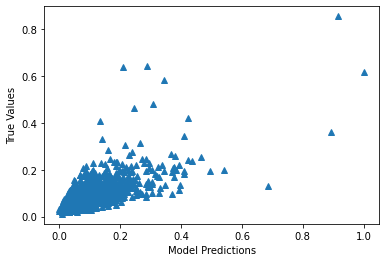

In [25]:
y_pred = model.predict(X_test)
plt.plot(y_test, y_pred, '^')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [26]:
y_pred_origin = scaler.inverse_transform(y_pred)
y_test_origin = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

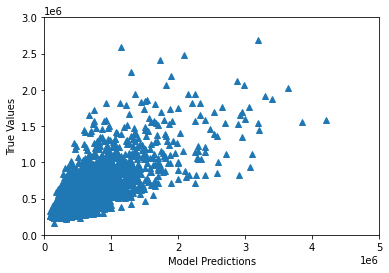

In [27]:
plt.plot(y_test_origin, y_pred_origin, '^')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [28]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

In [29]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_origin, y_pred_origin)), '.5f'))
MSE = float(format(mean_squared_error(y_test_origin, y_pred_origin), '.5f'))
MAE = float(format(mean_absolute_error(y_test_origin, y_pred_origin), '.5f'))
r2 = float(format(r2_score(y_test_origin, y_pred_origin), '.5f'))
adj_r2 = float(format(1-(1-r2) * (n-1)/(n-k-1), '.5f'))
MAPE = float(format(np.mean( np.abs( (y_test_origin-y_pred_origin)/y_test_origin ) )*100, '.5f'))

print('30% Testing data, 70% Training data:\n')
print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('Mean Absolute Percentage Error =', MAPE, '%')


30% Testing data, 70% Training data:

RMSE = 261989.63842
MSE = 68638570637.69131
MAE = 153736.63887
R2 = 0.57133
adj_r2 = 0.57077
Mean Absolute Percentage Error = 30.5998 %


# MULTIPLE LINEAR REGRESSION

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [32]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [33]:
y_pred_mlr = regressor.predict(X_test)

(0.0, 3000000.0)

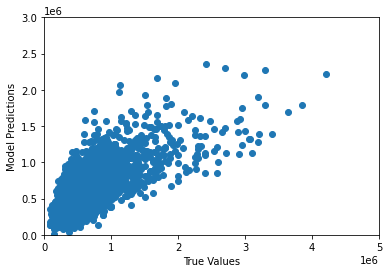

In [34]:
plt.scatter(y_test, y_pred_mlr)
plt.ylabel('Model Predictions')
plt.xlabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [35]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_pred_mlr)), '.5f'))
MSE = float(format(mean_squared_error(y_test, y_pred_mlr), '.5f'))
MAE = float(format(mean_absolute_error(y_test, y_pred_mlr), '.5f'))
r2 = float(format(r2_score(y_test, y_pred_mlr), '.5f'))
adj_r2 = float(format(1-(1-r2) * (n-1)/(n-k-1), '.5f'))
MAPE = float(format(np.mean( np.abs( (y_test-y_pred_mlr)/y_test ) )*100, '.5f'))

print('30% Testing data, 70% Training data:\n')
print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('Mean Absolute Percentage Error =', MAPE, '%')

30% Testing data, 70% Training data:

RMSE = 264858.35692
MSE = 70149949230.15884
MAE = 164352.1279
R2 = 0.5619
adj_r2 = 0.56133
Mean Absolute Percentage Error = 33.32175 %


# INCREASE THE NUMBER OF FEATURES

In [36]:
X = dataset.drop(['price', 'date'], axis = 1)
y = dataset['price']

print(X.info())
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [37]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y = y.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16209, 19) (16209, 1)
(5404, 19) (5404, 1)


In [39]:
model = Sequential()
model.add(Dense(100, input_dim = 19, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               2000      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 22,301
Trainable params: 22,301
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0011 - val_loss: 5.6328e-04
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 5.1714e-04 - val_loss: 6.1038e-04
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 4.4768e-04 - val_loss: 4.2580e-04
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 4.0835e-04 - val_loss: 3.9588e-04
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 3.8343e-04 - val_loss: 4.3626e-04
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 3.6882e-04 - val_loss: 4.5901e-04
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 3.4076e-04 - val_loss: 3.5357e-04
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 3.2169e-04 - val_loss: 3.9084e-04
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 3.2186e-04 - val_loss: 3.2986e-04
Epoch 10/100
260/260 [=

260/260 [==============================] - 0s 2ms/step - loss: 1.2807e-04 - val_loss: 3.4769e-04
Epoch 76/100
260/260 [==============================] - 0s 2ms/step - loss: 1.6792e-04 - val_loss: 2.9419e-04
Epoch 77/100
260/260 [==============================] - 0s 2ms/step - loss: 1.3091e-04 - val_loss: 2.8450e-04
Epoch 78/100
260/260 [==============================] - 0s 2ms/step - loss: 1.2786e-04 - val_loss: 2.9714e-04
Epoch 79/100
260/260 [==============================] - 0s 2ms/step - loss: 1.2970e-04 - val_loss: 2.7812e-04
Epoch 80/100
260/260 [==============================] - 0s 2ms/step - loss: 1.2624e-04 - val_loss: 2.8045e-04
Epoch 81/100
260/260 [==============================] - 0s 2ms/step - loss: 1.3021e-04 - val_loss: 2.9234e-04
Epoch 82/100
260/260 [==============================] - 0s 2ms/step - loss: 1.4470e-04 - val_loss: 3.0037e-04
Epoch 83/100
260/260 [==============================] - 0s 2ms/step - loss: 1.2838e-04 - val_loss: 2.8396e-04
Epoch 84/100
260/260 [=

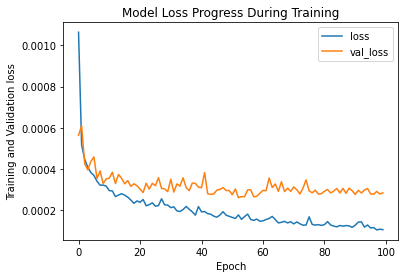

In [41]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation loss')
plt.legend(['loss', 'val_loss'])

In [43]:
y_pred_origin = scaler.inverse_transform(y_pred)
y_test_origin = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

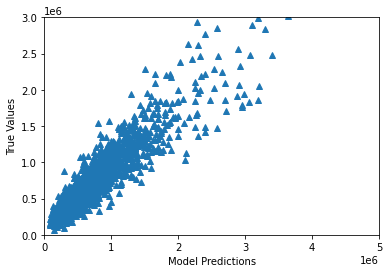

In [44]:
plt.plot(y_test_origin, y_pred_origin, '^')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [45]:
k = X_test.shape[1]
n = len(X_test)

RMSE = float(format(np.sqrt(mean_squared_error(y_test_origin, y_pred_origin)), '.5f'))
MSE = float(format(mean_squared_error(y_test_origin, y_pred_origin), '.5f'))
MAE = float(format(mean_absolute_error(y_test_origin, y_pred_origin), '.5f'))
r2 = float(format(r2_score(y_test_origin, y_pred_origin), '.5f'))
adj_r2 = float(format(1-(1-r2) * (n-1)/(n-k-1), '.5f'))
MAPE = float(format(np.mean( np.abs( (y_test_origin-y_pred_origin)/y_test_origin ) )*100, '.5f'))

print('30% Testing data, 70% Training data:\n')
print('RMSE =', RMSE)
print('MSE =', MSE)
print('MAE =', MAE)
print('R2 =', r2)
print('adj_r2 =', adj_r2)
print('Mean Absolute Percentage Error =', MAPE, '%')


30% Testing data, 70% Training data:

RMSE = 140874.15827
MSE = 19845528469.26904
MAE = 77471.08996
R2 = 0.87606
adj_r2 = 0.87562
Mean Absolute Percentage Error = 14.90944 %
